## Bak, Tang, Wiesenfeld (BTW) Sandpile Model

by [EF Legara](http://www.erikalegara.net)

---
In this notebook, we implement the sandpile model proposed by Bak, Tang, and Wiesenfeld [1]. The sandpile model is one of the earliest models to demonstrate [self-orgnanized criticality](https://en.wikipedia.org/wiki/Self-organized_criticality) --- a mechanism that is present in complex systems wherein a system approaches its "tipping point" without any additional external perturbations. This observation is in contrast with most systems wherein an external adjustable parameter needs to be tweaked to drive them to criticality. For example, heat must be added to ice for it to make a phase transition to water; in contrast with a self-organising system, its internal mechanism (like mere grain-grain interactions in a sandpile model) drives it to criticality.

<blockquote>
The key result of BTW's 1987 paper was its discovery of a mechanism by which the emergence of complexity from simple local interactions could be spontaneous — and therefore plausible as a source of natural complexity — rather than something that was only possible in the lab (or lab computer) where it was possible to tune control parameters to precise values. ([source](https://en.wikipedia.org/wiki/Self-organized_criticality#Overview))
</blockquote>

We follow closely Per Bak's description of the model in his book titled "How Nature Works" [2]. As stated in the book (pp. 52), in the sandpile model, "the table where the sand is dropped is represented by a two-dimensional grid". In this recipe, we define the grid as $\textbf{M}$, which is an $N \times N$ matrix. Each cell of $\textbf{M}$, which is represented by the coordinates $x$ and $y$, has a value $Z(x,y)$ that ranges from (0,3). This is how we initialize our matrix $\textbf{M}$ below. 

After the initialization, the simulation begins by dropping a grain of sand on the sandpile at some random location $x$ and $y$ such that when a grain is dropped on $\textbf{M}(x,y)$,

\begin{equation}
Z(x,y) \rightarrow Z(x,y) + 1
\end{equation}

This process is repeated $i$ times, which we define in this recipe as `iterations`. In the model, BTW set a critical cell value $Z_{\text{cr}}=3$ such that when that value is reached, the next time a grain is added on a critical cell ($Z(x,y)=3$), 4 grain units from that cell would spill (or topple) over to the neighboring cells. That is, when $Z(x,y) > 3$,

\begin{equation}
Z(x,y) \rightarrow Z(x,y) - 4
\end{equation}

and

\begin{equation}
Z(x \pm 1,y) \rightarrow Z(x \pm 1,y) +1, \,\,Z(x ,y\pm 1) \rightarrow Z(x ,y\pm 1) +1.
\end{equation}

In their model, when the toppling happens at the boundaries, grains of sand will just leave the system. This is implemented in the model by defining a boolean variable we call `withinBounds`. 

**References:**
1. P. Bak, C. Tang, and K. Wisenfeld (1987). "Self-Organized Criticality: An Explanation of 1/$f$ Noise," *Physical Review Letters* **59** (4).
2. Bak, Per. How Nature Works: The Science of Self-organized Criticality. New York, NY, USA: Copernicus, 1996. Print.


### Let's Begin


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(100000)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Setting parameters

The `iterations` correspond to the number of times we drop "sand" on the sandpile, which is represented by an $N \times N$ matrix $\textbf{M}$. We define `threshold` as the cricitcal value of a cell wherein it causes an avalanche. `topple` records the number of times the critical threshold value is reached.

In [2]:
iterations = 100000 # number of iterations
N = 50 # size of matrix

global threshold
threshold = 4 # critical level for toppling to occur

topple = 0
topplesize = []

### Defining functions
We then define two functions: `initializeMatrix()` and `drop()`, which are self-explanatory. Note that the model is restricted to the bounds of the matrix. 

In [3]:
def initializeMatrix(N):
    return np.random.randint(4, size=(N,N))

def drop(M, x, y):
    global topple
    withinBounds = True

    if x < 0  or x > N-1 or y < 0 or y > N-1:
        withinBounds = False
        pass

    if withinBounds:
        M[x,y] = M[x,y] + 1
        if M[x,y] >= threshold:
            M[x,y] = M[x,y] - 4 # reset the cell value and distribute to neighbors
            topple += 1 # count the toppling
            drop(M,x+1,y)
            drop(M,x-1,y)
            drop(M,x,y-1)
            drop(M,x,y+1)

### Initializing sandpile
In the next cell, we initialize our sandpile. We also plot how it looks like.

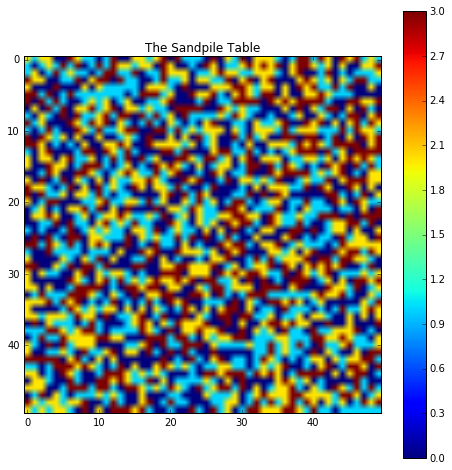

In [4]:
M = initializeMatrix(N)
plt.figure(figsize=(8,8))
plt.imshow(M)
plt.colorbar()
plt.title("The Sandpile Table")
plt.show()

### Begin simulation
We then start adding grains of sand, one-by-one, on the sandpile table, choosing a random location every iteration. 

In [5]:
for i in range(iterations):
    topple = 0
    x = random.randint(0, N-1)
    y = random.randint(0, N-1)
    drop(M, x, y)
    topplesize.append(topple)

#print max(topplesize)

### Plot results

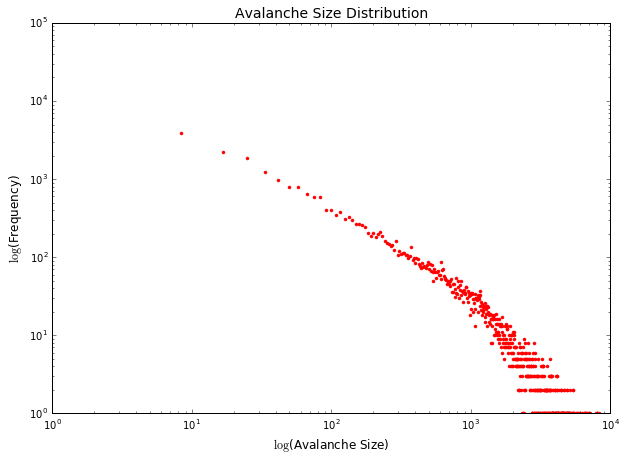

In [6]:
x, y = np.histogram(topplesize, 1000)
plt.figure(figsize=(10,7))
plt.clf()
plt.loglog(y[0:-1],x, 'r.')
plt.title("Avalanche Size Distribution", fontsize=14)
plt.xlabel(r"$\log$" + "(Avalanche Size)", fontsize=12)
plt.ylabel(r"$\log$" + "(Frequency)", fontsize=12)
plt.show()

The final matrix configuration is shown below.

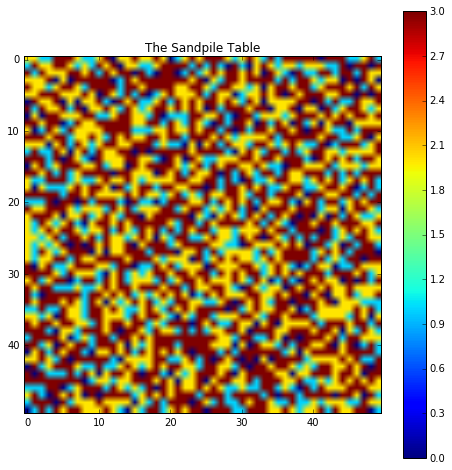

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(M)
plt.colorbar()
plt.title("The Sandpile Table")
plt.show()

### Power-law
Going back to the avalanche size distribution, let's check if it fits a power-law; and if it does, what is the value of $\alpha$ in $D(s) \sim s^{-\alpha}$? In [1], the reported $\alpha$ was $\sim 0.98$; while in [2], $\alpha \sim 1.1$. To investigate, we use the `powerlaw` [package](https://github.com/jeffalstott/powerlaw) written by Jeff Alstott, Ed Bullmore, and Dietmar Plenz [3]. 

<blockquote>
*powerlaw* is a toolbox using the statistical methods developed in [Clauset et al. 2007](http://arxiv.org/abs/0706.1062) and [Klaus et al. 2011](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0019779) to determine if a probability distribution fits a power law.
</blockquote>

1. P. Bak, C. Tang, and K. Wisenfeld (1987). "Self-Organized Criticality: An Explanation of 1/$f$ Noise," *Physical Review Letters* **59** (4).
2. Bak, Per. How Nature Works: The Science of Self-organized Criticality. New York, NY, USA: Copernicus, 1996. Print.
3. Jeff Alstott, Ed Bullmore, Dietmar Plenz. (2014). powerlaw: a Python package for analysis of heavy-tailed distributions. [PLoS ONE 9(1): e85777](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777)

In [8]:
import powerlaw

In [9]:
def plotDist(topplesize, xmin, xmax):
    x, y = powerlaw.pdf(np.array(topplesize), linear_bins=True)
    ind = y>0
    y = y[ind]
    x = x[:-1]
    x = x[ind]

    tsize = np.array(topplesize)
    fit = powerlaw.Fit(tsize[tsize>0], discrete=True, xmin=xmin, xmax=xmax)
    alpha = fit.power_law.alpha
    
    fig = plt.figure(figsize=(10,7))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(x, y, color='r', s=1.2, label="Empirical Data")
    plt.ylim(10e-7,10)
    powerlaw.plot_pdf(tsize[tsize>0], color='b', ax=ax1, linestyle='--', linewidth=1, label="Power-law fit")
    plt.xlabel(r"Avalanche Size, $s$", fontsize=12)
    plt.ylabel(r"$p(s)$", fontsize=12)
    _ = plt.text(10e1,15e-4,r"$\alpha$="+str(alpha), fontsize=13)
    _ = plt.legend(frameon=False)
    
    return

Calculating best minimal value for power law fit


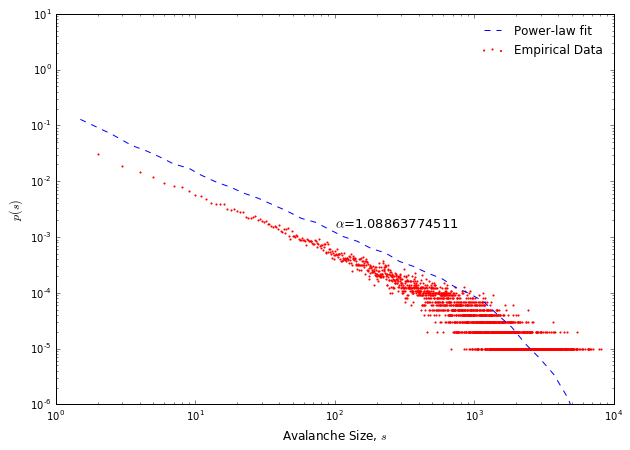

In [10]:
plotDist(topplesize, xmin=0, xmax=500)

The value $\alpha$ agrees well with the result of Bak, Tang, and Wiesenfeld.

Calculating best minimal value for power law fit


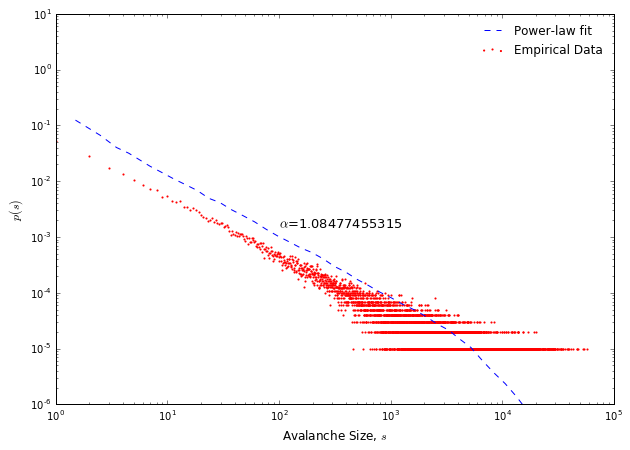

In [11]:
topplesize50 = topplesize

N = 100
M = initializeMatrix(N)

topplesize100 = []

for i in range(iterations):
    topple = 0
    x = random.randint(0, N-1)
    y = random.randint(0, N-1)
    drop(M, x, y)
    topplesize100.append(topple)

plotDist(topplesize100, xmin=0, xmax=500)

Calculating best minimal value for power law fit


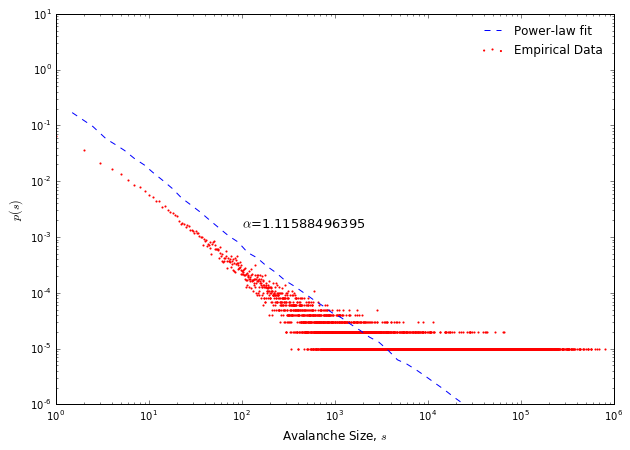

In [12]:
N = 300
M = initializeMatrix(N)

topplesize300 = []

for i in range(iterations):
    topple = 0
    x = random.randint(0, N-1)
    y = random.randint(0, N-1)
    drop(M, x, y)
    topplesize300.append(topple)

plotDist(topplesize300, xmin=0, xmax=3000)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


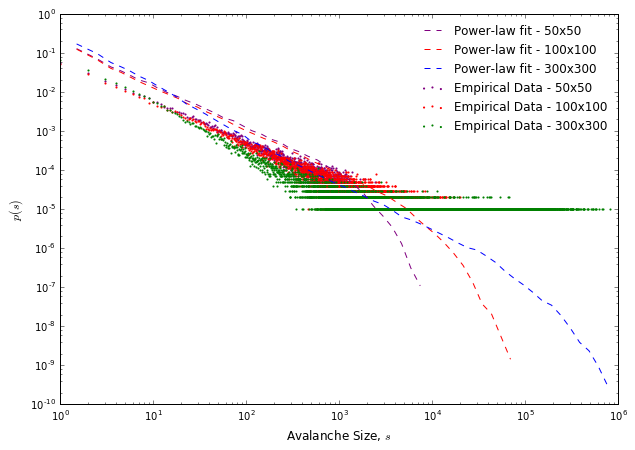

In [13]:
def getxy(tsize, xmin, xmax):
    x, y = powerlaw.pdf(np.array(tsize), linear_bins=True)
    ind = y>0
    y = y[ind]
    x = x[:-1]
    x = x[ind]
    tsizes = np.array(tsize)
    fit = powerlaw.Fit(tsizes[tsizes>0], discrete=True, xmin=xmin, xmax=xmax)
    alpha = fit.power_law.alpha
    return [x,y,tsizes,fit,alpha]

t50 = getxy(topplesize50, xmin=0, xmax = 500)
t100 = getxy(topplesize100, xmin=0, xmax = 500)
t300 = getxy(topplesize300, xmin=0, xmax = 3000)

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(t50[0], t50[1], color='purple', s=1.2, label="Empirical Data - 50x50")
ax1.scatter(t100[0], t100[1], color='r', s=1.2, label="Empirical Data - 100x100")
ax1.scatter(t300[0], t300[1], color='g', s=1.2, label="Empirical Data - 300x300")
#plt.ylim(10e-7,10)
powerlaw.plot_pdf(t50[2][t50[2]>0], color='purple', ax=ax1, linestyle='--', linewidth=1, label="Power-law fit - 50x50")
powerlaw.plot_pdf(t100[2][t100[2]>0], color='r', ax=ax1, linestyle='--', linewidth=1, label="Power-law fit - 100x100")
powerlaw.plot_pdf(t300[2][t300[2]>0], color='b', ax=ax1, linestyle='--', linewidth=1, label="Power-law fit - 300x300")
plt.xlabel(r"Avalanche Size, $s$", fontsize=12)
plt.ylabel(r"$p(s)$", fontsize=12)
#_ = plt.text(10e1,15e-4,r"$\alpha$="+str(alpha), fontsize=13)
_ = plt.legend(frameon=False)
    